# Linear regression exercise
In this exercise we will be working with the [Boston housing dataset](http://facweb.cs.depaul.edu/mobasher/classes/CSC478/Data/housing-dscr.txt), which gives information on housing prices for the suburbs of Boston. See the link for a description of the available parameters.

Below we do the first step for you, load the dataset and establish a training and test sets. You will need to implement the following:

1) Train a linear regression model for the training data. You can either use the python code or the sklearn implementation.

2) Test that the regression model works by computing the regression error on the test set

3) (Optional) As the number of records in this dataset is not very extensive, it might be a good idea to use a cross-validation/jackknifing method instead of defining a fixed train/test set. You can give it a try with the function sklearn.cross_validation

Consider doing some plotting and printing out of the data along the way to get a feeling of what you are looking at in here.


In [17]:
%matplotlib inline

import pandas as pd #used for reading/writing data 
import numpy as np #numeric library library
from matplotlib import pyplot as plt #used for plotting
import sklearn #machine learning library

from sklearn.datasets import load_boston
boston = load_boston()

In [18]:
#import data into a pandas dataFrame to be similar from our example
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target)

#split the data into train and test sets, with a 70-30 split
from sklearn.model_selection import train_test_split #creation of train.test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [19]:
from sklearn import preprocessing
#adapt output values to an array form
wineDataOutputArray = np.asarray(wineDataOutput.astype(float))
wineDataOutputArray = wineDataOutputArray[:, np.newaxis]
                       
#adapt input features as an array form, with an extra '1' for \theta_0 term (bias term)
wineDataInputArray_original = np.asarray(wineDataInput.astype(float))
### comment the next line out to test regression on unnormalized data
wineDataInputArray = preprocessing.scale(wineDataInputArray_original) 
wineDataInputArray = np.hstack((np.ones((wineDataInputArray.shape[0], 1)), wineDataInputArray))

#visualization of the normalized and unnormalized
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row')
f.set_figheight(7)
f.set_figwidth(15)
ax1.plot(wineDataInputArray_original[0:20, 0])
ax2.plot(wineDataInputArray_original[0:20, 1])
ax3.plot(wineDataInputArray_original[0:20, 2])
ax4.plot(wineDataInputArray[0:20, 1]) #note we added a column of 1's
ax5.plot(wineDataInputArray[0:20, 2])
ax6.plot(wineDataInputArray[0:20, 3])

NameError: name 'wineDataOutput' is not defined

# Use sklearn!

In [20]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(normalize=True)

In [21]:
%time
lm.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 25 µs


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [22]:
lm.intercept_

array([ 37.99259277])

In [23]:
lm.coef_

array([[ -1.19858618e-01,   4.44233009e-02,   1.18612465e-02,
          2.51295058e+00,  -1.62710374e+01,   3.84909910e+00,
         -9.85471557e-03,  -1.50002715e+00,   2.41507916e-01,
         -1.10671867e-02,  -1.01897720e+00,   6.95273216e-03,
         -4.88110587e-01]])

In [28]:
predictedQuality = lm.predict(X_test)
predictedQuality[0:10]

array([[ 24.93551831],
       [ 23.75668597],
       [ 29.3364008 ],
       [ 11.99898444],
       [ 21.37583999],
       [ 19.19718511],
       [ 20.57022126],
       [ 21.2138302 ],
       [ 19.05187659],
       [ 20.31028442]])

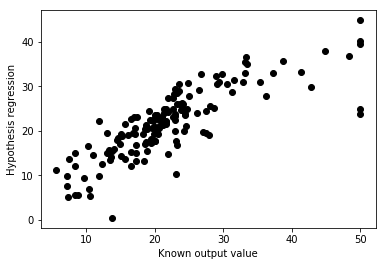

In [29]:
plt.scatter(y_test, predictedQuality,  color='black')
plt.ylabel('Hypothesis regression')
plt.xlabel('Known output value')

In [35]:
print(lm.score(X_test, y_test))
print((1.0 / y_test.shape[0]) * (np.sum(abs(predictedQuality - y_test))))

0.673528086535
0    3.608266
dtype: float64
